# Plotting with Python: a matplotlib tutorial
---

## Why use matplotlib?

* It's free!
* It's open source.
* Basic syntax is similar to matlab.
* **Everything** is customisable -- *every* component of a matplotlib plot is an object that you can manipulate.
* Python is a much more general, versatile scripting language than matlab. Great for gluing projects together.

---
## Contents of this tutorial

This tutorial will briefly cover the following:

* Basic matlab style usage
* Using the object-orientated API to give more customisability
* Creating subplots and inset plots of different types
* Setting parameters to make plots match LaTeX documents
* Creating simple 2D surface plots
* Plotting 3D objects with adjustable light sources
* Writing a script to read in a folder full of data files to be plotted
* Writing a script to read in a folder full of image files and stacking them into a movie

Also, see [here](https://matplotlib.org/gallery.html) for an extensive showcase of examples of matplotlib plots.

---
## Basic usage (matlab style)


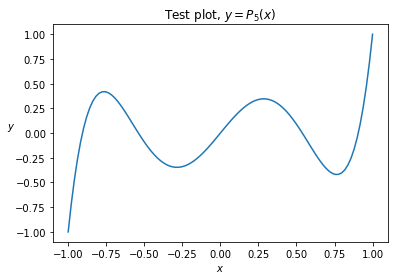

In [18]:
#This command only needed if using Jupyter
%matplotlib inline

#Import the plotting module and numpy 
import matplotlib.pyplot as plt
import numpy as np

#For example, compute 5th Legendre polynomial
from scipy.special import legendre
f = legendre(5)
g = legendre(8)
x = np.linspace(-1,1,100)
y = f(x)
y2 = g(x) 

# #To read in some data
# dat = np.genfromtxt("fname.csv", delimiter=",")
# x, y = np.hsplit(dat, 2) 

#Now plot it
plt.plot(x,y)
plt.title("Test plot, $y=P_{5}(x)$")
plt.xlabel("$x$")
plt.ylabel("$y$", rotation=0)
plt.show()


 * Simple customisation can be done by specifying ```linestyle```, ```linewidth```, ```color``` and ```markerstyle```. These can also be abbreviated.

* Default available colours are ```b``` (blue), ```k``` (black), ```r``` (red), ```g``` (green), ```c``` (cyan), ```m``` (magenta), ```y``` (yellow) and ```w``` (white).

* To save a figure, use ```plt.savefig(filename, fmt='format')```, where ```format``` could be ```png```, ```jpg```, ```svg```, ```pdf``` and more ... 

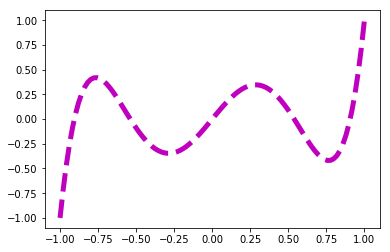

In [19]:
#Matlab style syntax
plt.plot(x, y, 'm--', lw=5)
plt.show()

---
## Better practices -- object orientation

 * It's best to use matplotlib in a more object orientated way.
 * Below is a quick example of a class if you're not familiar with OOP.

 



In [20]:
#Begin the class definition
class Wallet: 
    
    #Some variables that belong to this class
    CreditCard = 0.0
    Cash = 0.0 
    
    #The constructor function 
    def __init__(self):
        return None
    
    #Below are two functions that belong to this class
    def AddCash(self, x):
        self.Cash += x 
        
    def PrintStatement(self):
        print "I have £%g" %self.Cash
        

#We can now declare an instance of the class we defined above
mywallet = Wallet()

#And now access its member functions using the dot notation
mywallet.AddCash(10.0) 
mywallet.PrintStatement()

I have £10


 * In **Matplotlib** a plot is a collection of objects that can be passed around, with properties that can be manipulated. 
 * The most important class is ```figure```:

In [21]:
fig = plt.figure() 

* The ```figure``` class is the canvas.
* The next most important class is the ```Axes``` class, this contains most of what we need.
* A convenient way to instantiate an ```Axes``` object is using the ```add_subplot``` function, which belongs to the ```figure``` class:


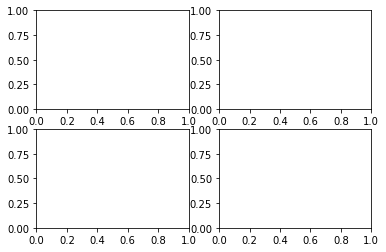

In [22]:
#Declare a figure object 
fig = plt.figure() 

#Now create an axis object for each subplot using fig's add_suplot function 
ax0 = fig.add_subplot(2,2,1)
ax1 = fig.add_subplot(2,2,2)
ax2 = fig.add_subplot(2,2,3)
ax3 = fig.add_subplot(2,2,4)
plt.show()

* The ```add_sublot``` functions take a tuple ```(nrows, ncols, axisID)```.
* If the number of rows and columns is in the single digits, then you can even leave out the commas:

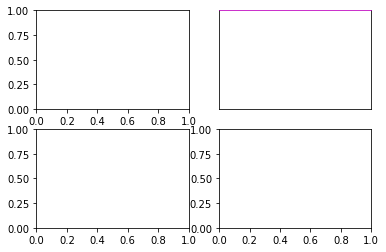

In [23]:
fig = plt.figure() 
ax0 = fig.add_subplot(221)
ax1 = fig.add_subplot(222)
ax2 = fig.add_subplot(223)
ax3 = fig.add_subplot(224)

#You can then access any of the axis objects, 
#and plot to it or use any of its member functions,
#such as set_xticks etc
ax1.set_xticks([])
ax1.set_yticks([])

#Even the spines around the plot are objects with member functions which we
#can access and use
toprightspine = ax1.spines['top']
toprightspine.set_color('m')

plt.show()

* Any of the ```Axes``` objects can be manipulated and plotted to. 
* See [here](https://matplotlib.org/api/axes_api.html#axis-limits) for a full list of methods and variables available for the ```Axes``` object.
* For example:

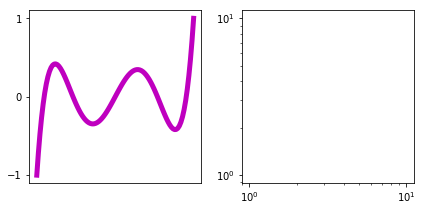

In [24]:
#Again, create a figure
fig = plt.figure()

#Now add two plots side by side within the figure 
ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122) 

#Now plot to the left plot
ax0.plot(x, y, 'm-', lw='5.0') 

#Adjust the ticks of the left plot
ax0.set_xticks([ ])
ax0.set_yticks([-1,0,1])
ax0.set_aspect('equal')

#Make the right hand plot logarithmic (for example)
ax1.set_xscale("log", nonposx='clip')
ax1.set_yscale("log", nonposx='clip')
ax1.set_aspect('equal')

plt.tight_layout()
plt.show()

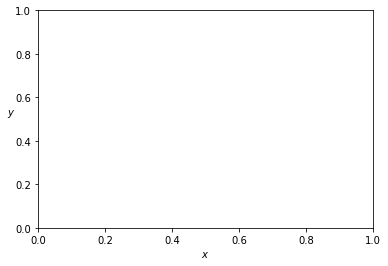

In [25]:
#For a single plot
fig = plt.figure() 
ax0 = fig.add_subplot(111)

#Labels can be set like this
ax0.set_xlabel("$x$")
ax0.set_ylabel("$y$", rotation=0)
plt.show()

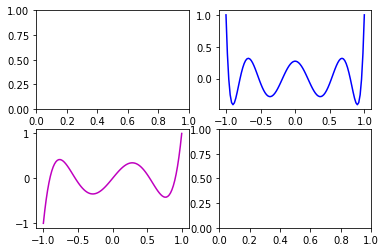

In [26]:
#Another, more compact notation you might see
fig, axvec = plt.subplots(2, 2)

#axvec is now a matrix containing the 4 axis objects
#We can access each individual axis like this 
axvec[1,0].plot(x,y,'m-')
axvec[0,1].plot(x,y2,'b-')
plt.show()


* You can also set options at the point when you create the figures and axes:

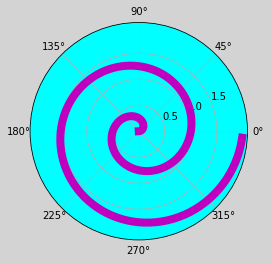

In [27]:
#Make the canvas grey
fig = plt.figure(facecolor='#D3D3D3')

#Make the plot polar and change its colour
ax0 = fig.add_subplot(111, projection='polar', facecolor='cyan')

#Compute a spiral 
r = np.arange(0, 2, 0.01)
theta = 2.0*np.pi*r

#Plot it
ax0.plot(theta, r, 'm-', lw=8.0)

#Now set its ticks
ax0.set_yticks([0.5, 1, 1.5])
plt.show()

* Python allows you to create objects called dictionaries.
* These are convenient for setting global parameters.
* For example:

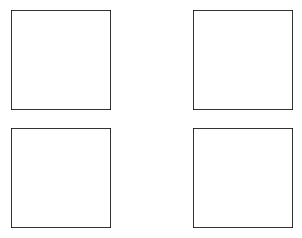

In [28]:
#Say I want to turn off ticks and set aspect ratio for all plots in my figure.
#Create a dictionary
mydict = {'xticks':([]), 'yticks':([]), 'aspect':'equal'}

#Now create a figure and pass to it my dictionary
fig, axvec = plt.subplots(2, 2, subplot_kw=dict(mydict))
plt.show()

* Another good use is to set the fontsizes globally.
* The following settings should match a LaTeX document nicely.


In [29]:
import matplotlib

#Set up plot style
font = {'size'   : 16}
matplotlib.rc('font', **font)
matplotlib.rc('font', serif='Computer Modern Roman')

* Now that we've set these global parameters, lets see how our plots look:

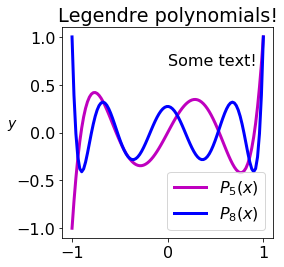

In [30]:
fig = plt.figure()
ax0 = fig.add_subplot(111)

#Now plot, including a legend
ax0.plot(x, y, 'm-', lw=3.0, label='$P_{5}(x)$') 
ax0.plot(x, y2, 'b-', lw=3.0, label='$P_{8}(x)$')
ax0.set_aspect('equal')

#Add some text, first two arguments of this are the cartesian coordinates
ax0.text(0,0.7, 'Some text!')

#Add the legend
ax0.legend(loc=4)

#Add title
ax0.set_title("Legendre polynomials!")

#Set axis labels
ax0.set_ylabel("$y$", rotation=0, fontsize=14)

plt.tight_layout()
plt.show()

## Creating an inset plot

* Use the ```inset_axes``` object:

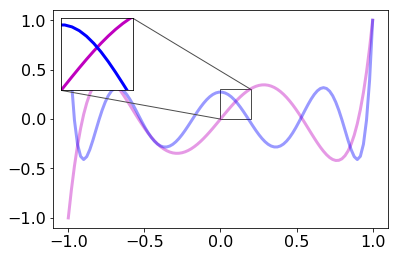

In [32]:
#Here's how to do an inset plot
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

fig = plt.figure()
ax0 = fig.add_subplot(111)

# Create an inset axis object
axins = inset_axes(ax0, width=1, height=1, loc=2)

#Plot the same thing to both ax0 and axins
axins.plot(x, y, 'm-', lw=3.0) 
axins.plot(x, y2, 'b-', lw=3.0)
ax0.plot(x, y, 'm-', lw=3.0, alpha=0.4) 
ax0.plot(x, y2, 'b-', lw=3.0, alpha=0.4)

# Set inset options
# This is the location of the limits of the sublplot
xx1, xx2, yy1, yy2 = 0.0, 0.2, 0.0, 0.3
axins.set_xlim(xx1, xx2)
axins.set_ylim(yy1, yy2)

# Turn of the ticks in the subplot
axins.set_xticks([])
axins.set_yticks([])

# draw a bbox of the region of the inset axes in the parent axes and
# connecting lines between the bbox and the inset axes area
mark_inset(ax0, axins, loc1=1, loc2=3, fc="k", ec="0.3")

# plt.tight_layout()
plt.show()


## Creating a bifurcation plot

Bifurcation plots can be tricky to do in python. Here is the method I use. I typically have my data saved in a 3-column array, the first two columns giving the $(x,y)$ coordinates, and the third column giving a binary variable which encodes stability -- 0 and 1 for stable and unstable respectively. I then wish to plot areas of stability and instability as solid and dashed lines. See the following script.

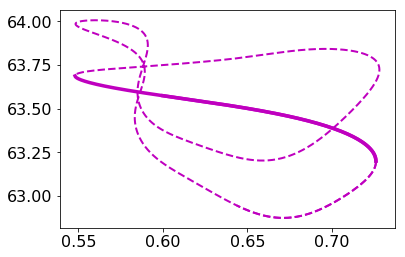

In [33]:
from itertools import groupby

#Read in data
data = np.genfromtxt('sampledata/testbif.txt')
x, y, stability = np.hsplit(data, 3)

#Group according to stability
for g_z, group in groupby(zip(zip(x, y), stability), lambda p: p[1]):
    g_x, g_y = [], []
    for i in group:
        g_x.append(i[0][0])
        g_y.append(i[0][1])
        
    #Plot as dashed or solid line according to stability
    if g_z:
        plt.plot(g_x, g_y, linestyle='--', color='m', linewidth=2.0)
    else:
        plt.plot(g_x, g_y, linestyle='-', color='m', linewidth=3.5)
        
plt.show() 

## Creating a 2D plot

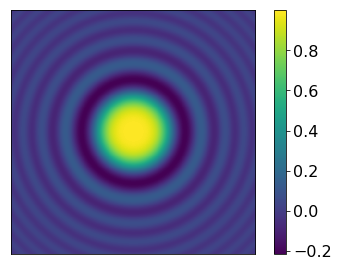

In [34]:
from matplotlib import cm, colors

#Again, create a figure
fig = plt.figure()
ax0 = fig.add_subplot(111)

#Create a mesh grid
xprime = np.linspace(-5, 5, 1000)
yprime = np.linspace(-5, 5, 1000)
X,Y = np.meshgrid(xprime, yprime)

#Create a surface to plot
surf1 = np.sin(X**2 + Y**2)/(X**2 + Y**2)

#Normalise the colormap
norm=colors.Normalize(vmin = np.min(surf1), 
    vmax = np.max(surf1), clip = False)

ax0.imshow(surf1, cmap='viridis', norm=norm)
ax0.set_xticks([])
ax0.set_yticks([])
ax0.set_aspect('equal')

#Colorbar
m = cm.ScalarMappable(cmap='viridis', norm=norm)
m.set_array(surf1)  

plt.colorbar(m)
plt.tight_layout()
plt.show()

## Quick 3D example (plotting a spherical harmonic)

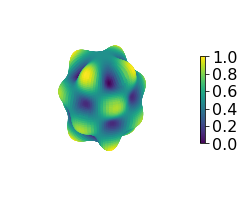

In [31]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import sph_harm
from matplotlib.colors import LightSource

# Set up a grid
phi = np.linspace(0, np.pi, 100)
theta = np.linspace(0, 2*np.pi, 100)
phi, theta = np.meshgrid(phi, theta)

# Calculate the spherical harmonic 
fcolors = sph_harm(4, 7, theta, phi).real
fmax, fmin = fcolors.max(), fcolors.min()
fcolors = (fcolors - fmin)/(fmax - fmin)

# The Cartesian coordinates of the unit sphere
x = (0.5*fcolors+1.0)*np.sin(phi)*np.cos(theta)
y = (0.5*fcolors+1.0)*np.sin(phi)*np.sin(theta)
z = (0.5*fcolors+1.0)*np.cos(phi)

# Set the aspect ratio to 1 so our sphere looks spherical
fig = plt.figure(figsize=plt.figaspect(1.))

#Create a custom light source
ls = LightSource(170, 45)
rgb = ls.shade(fcolors, cmap=cm.viridis, vert_exag=0.1, blend_mode='soft')

#Plot the surface in an axis object, making sure to override the custom shading
#by typing shade=False
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z,  rstride=1, cstride=1, facecolors=cm.viridis(fcolors), shade=False)

# Turn off the axis panes
ax.set_axis_off()

#Add a colourbar
m = cm.ScalarMappable(cmap='viridis')
m.set_array(fcolors)  
plt.colorbar(m, shrink=0.4)

#Stop the figure from looking squished
ax.set_aspect('equal')

plt.show()

## Reading in a set of data files and plotting them 

Let's say we have a directory, called ```data/``` containing a load of output data files that you've generated from (let's say) a C++ simulation that you've run. The following script (available in this folder containg this tutorial) will sequentially read in the data files from that directory and plot them and save them in another directory called ```frames/```.

For this example, we'll assume that the files are ```.txt``` files and contain data in the form of a matrix that we wish to plot as a 2D surface to be saved as a ```png``` image. Of course you can change the script to handle whatever data shape and do whatever plot you like. This script is just meant as a template.

It's easiest if the files are named in a sensible way, like ```file_1.txt```, ```file_2.txt```,...,```file_100.txt``` etc. If not, then they will be plotted and saved  accoring to the alphanumerical order of the filename.  



In [2]:
#These modules give your script the ability to navigate around your computer
import glob, os

#Location of the files to read in
searchDirectory = "data/"

#Now read the file names. If they are named as above you could 
#use the following command to read them in order
files = filter(os.path.isfile, glob.glob(searchDirectory + "file_*"))

#If their names are arbitrary and you don't care about their order, then
#use the following command instead (which I've commented out):
# files = filter(os.path.isfile, glob.glob(searchDirectory + "*"))

#If you want the files to be sorted according to modification date,
# then include the following command
files.sort(key=lambda x: os.path.getmtime(x))

#Plot all of these files as frames 
#This is the directory in which they'll be saved
targetDirectory = "frames/"
counter = 0
for f in files:

    #Name the file in which to save the plot
    fname = targetDirectory + "frame_%i.png" %counter
    
    #Now plot the contents of the file
    #These next two commands can be modified to plot the 
    #data in whichever way you want
    try:
        u = np.genfromtxt(f)
        plt.imshow(u, cmap='viridis') 
        plt.savefig(fname)
        
    #If any of the files are unreadble or unplottable
    #for some reason, then an error message will be 
    #spat out and the script will move onto the next file
    except Exception:
        print "\nError plotting file named %s" %f 
        continue
    
    counter += 1

## Compiling a set of image files into a movie 

One of the biggest shortcomings of matplotlib is that compiling movies is a slow and memory intensive process. Many of the methods suggested in the matplotlib documentation are too memory intensive to be practical, especially if you also have a demanding simulation running aswell. 

The best method is therefore to periodically output data, either as a plotted image file, or as raw data files that can then be plotted afterwards (using the above script). Then these image files should be compiled into a movie. There are many options to compile images into movies. 

In Linux, the best method is to use ```ffmpeg```. Simply navigate into the directory containing the image files and type into the command line: 
```
ffmpeg -r 30 -f image2 -i frame_%04d.png -vcodec libx264 -crf 25  test.mp4
```

The option ```-r 30``` specifies 30fps, and ```-crf 25``` specifies the quality of the video encoding. It assumes that the files to be compiled into a movie are named like ```frame_0001.png```, ```frame_0002.png``` etc. If you have fewer zeros in your filenames then specify ```-i frame_%0nd.png``` where ```n``` is the number of zeros in the filename. The output filename is ```test.mp4```. 

The above should work in mac too, although you will need to download and install ffmpeg first. 

You could also use ImageMagic, which works simlarly. To use it, type something like 
```
convert -quality 100 *.png test.mpg
```

This is kind of unreliable in mac though, so you might need to consult stack exchange. You could of course use Quicktime Pro, Windows movie maker or Photoshop pro if you have it. 

There's also an option to use Python here too. For example, the script below should work. However, using this method you run into some performance issues, since you are required read in all of the images and store them in an array.  


In [ ]:
import matplotlib.image as mgimg
from matplotlib import animation

#Create a figure
fig = plt.figure()

#Create an empty array in which to store frames
frameStack = []

#Again, load in files like the previous script
searchDirectory = "frames/"
files = filter(os.path.isfile, glob.glob(searchDirectory + "frame_*"))

#Now iterate through the files and read them in
for f in files:
    
    #Read in image file
    img = mgimg.imread(f)
    imgplot = plt.imshow(img)
    
    #Append this to the list of frames 
    frameStack.append([imgplot])
    
#Create an animation object 
myMovie = animation.ArtistAnimation(fig, frameStack, interval=1000, repeat_delay=1000)

#Now save this into an ```mp4``` video
myMovie.save("test.mp4")